# Lab 0
Basic Image Manipulation and Analysis

You are given 3 images of coins on a desk (c1,c2,c3) with their masks (m1,m2,m3) - which contain labels telling you which pixels belong to the coins and which pixels belong to the desk.

In [1]:
import cv2
import numpy
import scipy.stats
from mpmath import *
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

import numpy as np

In [2]:
def load_and_display_img(imgname, gray=False):
    """
    Loads an image and displays it, can use gray if instructed to
    """
    img = plt.imread(imgname)
    if gray:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.title(imgname)
    plt.show()
    return img

In [3]:
def convert_to_gray(img,name=""):
    """
    Converts an image to grayscale and plots it
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    title = "Gray Image "+str(name)
    plt.title(title)
    plt.show()
    return img
    
def convert_to_hsv(img, name=""):
    """
    Converts an image to hsv and plots it
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    plt.imshow(img)
    title = "HSV Image "+str(name)
    plt.title(title)
    plt.show()
    return img

# 2 Reading and Displaying the Images
Read in the images and masks. Use `matplotlib.pyplot.imshow` to view the 3 components of the images separately. Display the colour image. Does it look correct?
* My method uses `matplotlib` so it does not look incorrect. However, as shown below, when the images are read in with `OpenCV` they have the incorrect color when displayed with `matplotlib`.

The colour of the images may look wrong because `OpenCV` uses a `BGR` colour space where `matplotlib` (and most other libraries) use an `RGB` colour space. 

Try swapping the channel order using python slices if you run into that problem.

**2.1**:
Use the `cvtColor` function to convert the 3 images into `greyscale` and display them.

**2.2**: Use the `cvtColor` function to convert the 3 images into the `HSV` colour space and display them.

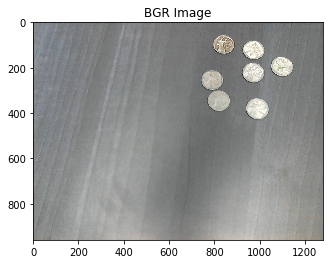

(960, 1280, 3)


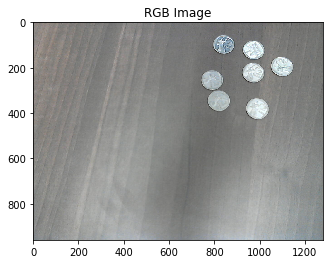

In [4]:
# Using cv2 and plotting with matplotlib distorts colour.
i = cv2.imread("c1.jpg")
plt.imshow(i)
plt.title("BGR Image")
plt.show()
# The shape of the image values
print(i.shape)
# We can change the order to represent this as RGB from BGR
rgb = i[...,::-1]
plt.imshow(rgb)
plt.title("RGB Image")
plt.show()

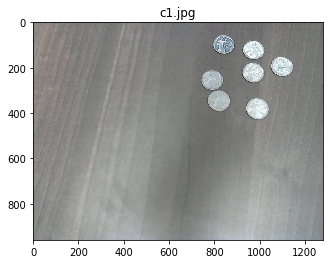

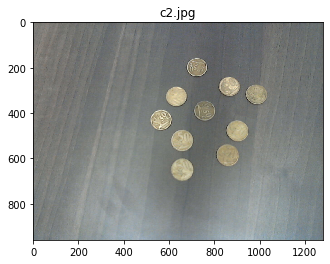

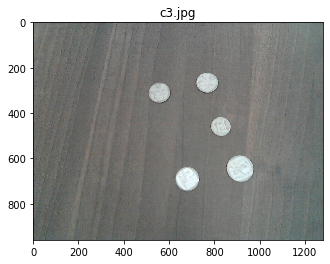

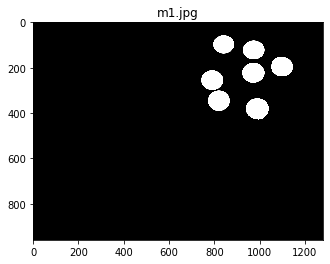

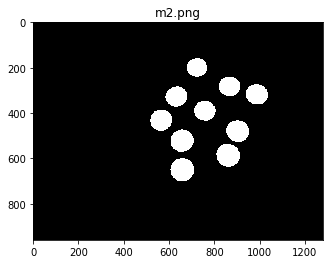

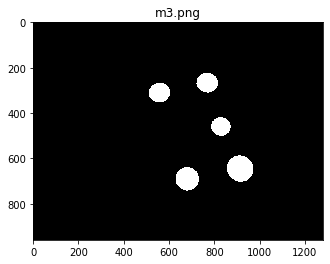

In [5]:
"""
Loading and Displaying images without doing BGR/RGB conversion
"""
c1 = load_and_display_img("c1.jpg")
c2 = load_and_display_img("c2.jpg")
c3 = load_and_display_img("c3.jpg")
m1 = load_and_display_img("m1.jpg")
m2 = load_and_display_img("m2.png")
m3 = load_and_display_img("m3.png")

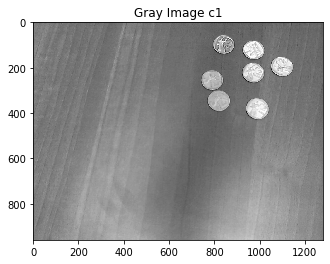

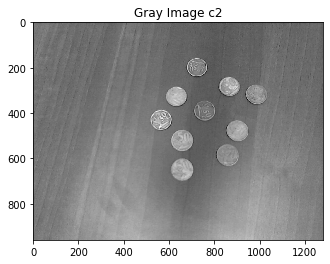

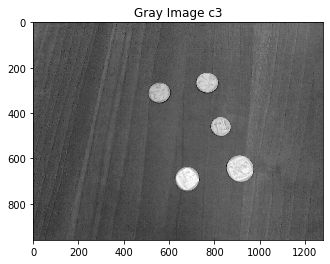

Done


In [6]:
"""
Changing to greyscale
"""
convert_to_gray(c1,name="c1")
convert_to_gray(c2,name="c2")
convert_to_gray(c3,name="c3")
print("Done")

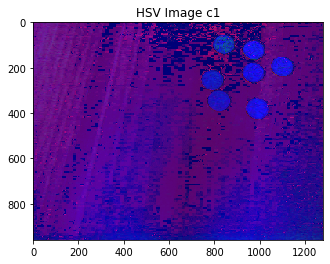

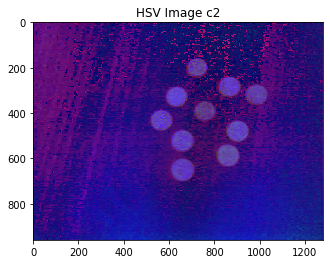

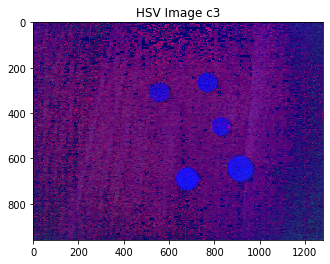

over


In [28]:
"""
Changing to HSV
"""
h1 = convert_to_hsv(c1,name="c1")
convert_to_hsv(c2,name="c2")
convert_to_hsv(c3,name="c3")
print("over")

## 3 Descriptive Statistics
For one of the 3 images:
1. What is the width of the image?
2. What is the height of the image?
3. How many pixels are in the image in total?
4. How many black pixels are there in the mask?
5. How many white pixels are there in the mask?

In [32]:
def find_image_stats(img):
    """
    Prints the height, width and total number of pixels
    """
    w = img.shape[0]
    h = img.shape[1]
    print("Width:",w)
    print("Height:",h)
    print("Size:",w*h)
    
def find_mask_stats(img):
    """
    Takes out colour component
    counts number of black vs white pixels
    There is noise in the mask, so 20 was used to get rid of it
    """
    img = img[:,:,0]
    print("Black Pixels:",len(img[img<=20]))
    print("White Pixels:",len(img[img>20]))

In [9]:
find_image_stats(c1)

Width: 960
Height: 1280
Size: 1228800


In [10]:
find_mask_stats(m1)

Black Pixels: 1181637
White Pixels: 47162


Using the greyscale version of the image
6. What is the minimum pixel value in the image?
7. What is the maximum pixel value in the image?
8. What are the minimum and maximum pixel values of the coin pixels?
9. What are the minimum and maximum pixel values of the desk pixels?
10. What is the mean pixel intensity in the image?
11. What is the mean brightness of the coin pixels?
12. What is the mean brightness of the desk pixels?
13. What is the variance in the brightness for coin pixels?
14. What is the variance in the brightness for desk pixels>

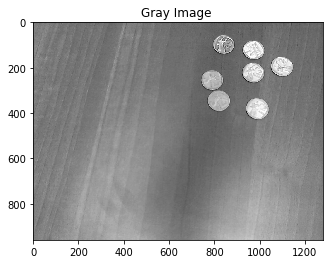

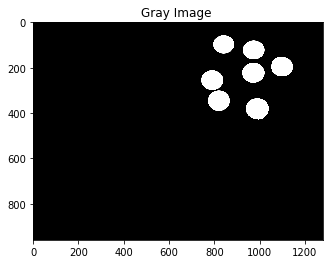

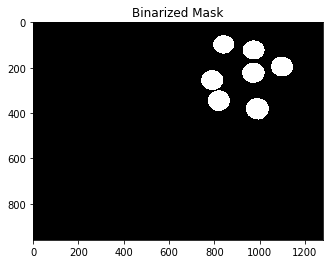

In [11]:
g1 = convert_to_gray(c1)
mg1 = convert_to_gray(m1)
mg1[mg1<128]=0
mg1[mg1>=128]=1
plt.title("Binarized Mask")
plt.imshow(mg1,cmap='gray');

In [13]:
print("Min value:",g1.min())
print("Max value:",g1.max())
print(g1.shape)
print(mg1.shape)
coins = g1[mg1==1]
print("Min Coin Value:",coins.min())
print("Max Coin value:",coins.max())
desk = g1[mg1==0]
print("Min Desk Value:",desk.min())
print("Max Desk Value:",desk.max())
print("Mean Value:",g1.mean())
print("Mean Coin Value:",coins.mean())
print("Mean Desk Value:",desk.mean())
print("Variance Coins:",coins.var())
print("Variance Desk:",desk.var())

Min value: 18
Max value: 255
(960, 1280)
(960, 1280)
Min Coin Value: 18
Max Coin value: 255
Min Desk Value: 24
Max Desk Value: 207
Mean Value: 138.0039786783854
Mean Coin Value: 197.79528443907301
Mean Desk Value: 135.61751197702847
Variance Coins: 1271.836110325027
Variance Desk: 329.738513560562


15. display a histogram of the red pixel intensities in the image
16. display a histogram of the green pixel intensities in the image
17. display a histogram of the blue pixel intensities in the image
18. repeat the previous 3 steps for one of the mask images
19. display a histogram of the pixel intensities of all pixels in the image (across all channels)
20. display a histogram of the pixel intensities of the pixels in the greyscale image.
21. display the relevant histograms of the channels in the HSV image

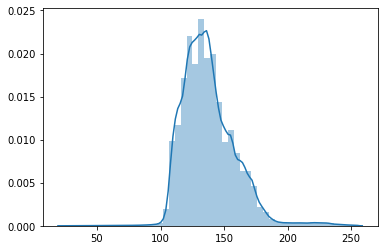

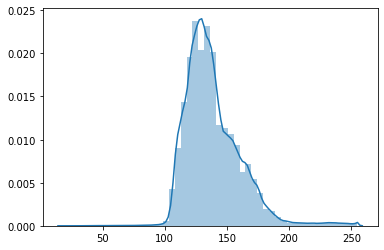

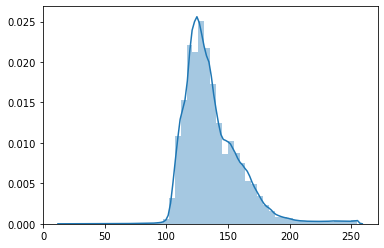

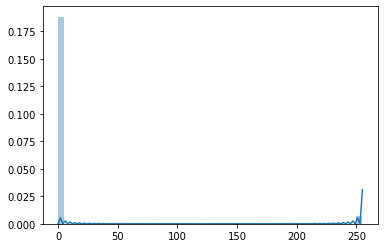

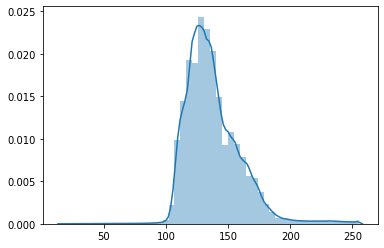

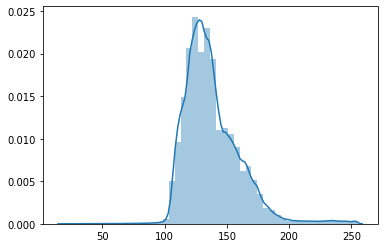

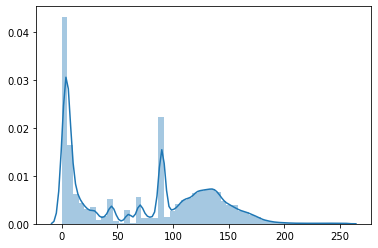

In [31]:
sns.distplot(c1[:,:,0].ravel(), label="Red")
plt.show()

sns.distplot(c1[:,:,1].ravel(), label="Green")
plt.show()

sns.distplot(c1[:,:,2].ravel(), label="Blue")
plt.show()

sns.distplot(m1.ravel(), label="Mask")
plt.show()

sns.distplot(c1.ravel(),label="All")
plt.show()

sns.distplot(g1.ravel(),label="Gray")
plt.show()

sns.distplot(h1.ravel(),label="HSV")
plt.show()

In [18]:
c1[:,:,0].shape

(960, 1280)